In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving labeled.csv to labeled.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['labeled.csv']))

In [ ]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [ ]:
df['toxic']=df['toxic'].apply(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


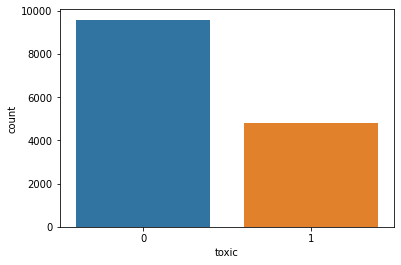

In [ ]:
import seaborn as sns
sns.countplot(df['toxic'])

In [ ]:
train,test=train_test_split(df,test_size=0.3)


prerocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ex=df.iloc[1]['comment']
token=word_tokenize(ex,language='russian')
stop_words=stopwords.words('russian')
token_without_punctuation=[i for i in token if i not in string.punctuation]
token_without_stop_words_and_punctuation =[i for i in token_without_punctuation if i not in stop_words]
snowlall=SnowballStemmer(language='russian')
stemmed=[snowlall.stem(i) for i in token_without_stop_words_and_punctuation]
print(stemmed)

['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stop_words=stopwords.words('russian')
snowlall=SnowballStemmer(language='russian')

def proc(ex:str):
  tokens=word_tokenize(ex,language='russian')
  tokens=[i for i in tokens if i not in string.punctuation]
  tokens=[i for i in tokens if i not in stop_words]
  tokens=[snowlall.stem(i) for i in tokens]
  return tokens

proc('Собаке - собачья смерть\n	')

['собак', 'собач', 'смерт']

In [ ]:
vectorizer=TfidfVectorizer(tokenizer=lambda x: proc(x))

In [ ]:
features=vectorizer.fit_transform(train.comment)

In [ ]:
model=LogisticRegression(random_state=0)
model.fit(features,train.toxic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(features[0])

array([0])

In [ ]:
train.comment[0]

'Верблюдов-то за что? Дебилы, бл...\n'

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
model_pl=Pipeline([('vectorizer',TfidfVectorizer(tokenizer=lambda x: proc(x))),('model',LogisticRegression(random_state=0))])

In [ ]:
model_pl.fit(train.comment,train.toxic)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7fb37fcb1cb0>,
                                 use_idf=True, vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fi

In [ ]:
model_pl.predict(['я считаю это очень смешным и остроумным и никто не убедит меня в обратном'])[0]

0

In [ ]:
def anal(ex):
  if model_pl.predict([ex])[0]==0:
    print('ты такой хороший')
  else:
    print('тебе стоит стать добрее')

In [ ]:
anal('Ты шлюха вокзальная, святая кормилица Живая вода, беспощадная виселица Ста ртами заплевана, роза пурпурная Да не ты ль родила меня, мать шестиструнная')

будь добрее к людям
